# Business Understanding
*      Objective
*      Description

## Objective
Make a prediction on mental health issues in tech

## Description
Computer Science is often seen as a profession that yealds a good wage and a stable job. But is there a hidden side to Computer Science that intrinsicly leads people who persue it in a possition to develop mental health issues.

In this project I'll use 2 datasets from Open Sourcing Mental Illness, LTD. That contain answers from a questionain that were filled out in 2014 and 2016 concerning mental health in Computer Science which can both be found here https://www.kaggle.com/osmi/mental-health-in-tech-survey and here https://www.kaggle.com/osmi/mental-health-in-tech-2016

# Data Understanding and Preperation 
* Import Libraries
* Load data
* aggregate data 
* clean missing values
* clean noisy data
* Statistical summaries

## Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [24]:
#read in CSV and create dataframe
df2016 =  pd.read_csv('mental-health-2016.csv', sep=',')
df2014 =  pd.read_csv('mental-health-2014.csv', sep=',')

## Aggregate data

In [25]:
#define columns and new headders
dataforfirst = [[56,'age'],
[57,'gender'],
[1,'self-employed'],
[2,'company size'],
[58,'what country do you live?'],
[59,'if USA, what state'],
[62,'what position?'],
[63,'remote?'],
[5,'healthcare provided'],
[9,'anonyminity protected?'],
[10,'take leave due to mental health'],
[13,'discuss with a co-worker?'],
[14,'discuss with a superviser'],
[23,'productivity affected'],
[24,'how much is affected'],
[41,'would it affect your career'],
[47,'issues in the past'],
[48,'do you currently have a mental health issue'],
[49,'if yes,what?'],
[50,'if maybe, what?'],
[51,'have you been diagnosed'],
[52,'if so, what?'],
[53,'have you sought treatment'],
[54,'does it interfere with your work while treated well'],
[55,'does it interfere with your work while treated not well']]

dataforsecond = [
[2,'age'],
[3,'gender'],
[6,'self-employed'],
[10,'company size'],
[4,'what country do you live?'],
[5,'if USA, what state'],
[11,'remote?'],
[14,'healthcare provided'],
[17,'anonyminity protected?'],
[18,'take leave due to mental health'],
[21,'discuss with a co-worker?'],
[20,'productivity affected'],
[16,'have you sought treatment']
]

In [26]:
#create new dataframe from 2016 datasets with new headers and column positions
column_names = df2016.columns
dfquestions = pd.DataFrame()

for i in range(len(dataforfirst)):
    temp = df2016[column_names[dataforfirst[i][0]-1]]
    dfquestions[dataforfirst[i][1]] = temp
dfquestions['year'] = 2016    

In [27]:
#create new dataframe from 2014 datasets with new headers and column positions
column_names = df2014.columns
dfquestions2014 = pd.DataFrame()

for i in range(len(dataforsecond)):
    temp = df2014[column_names[dataforsecond[i][0]-1]]
    dfquestions2014[dataforsecond[i][1]] = temp
dfquestions2014['year'] = 2014

In [28]:
#Aggrigate 2016 and 2014 datasets
dfquestions = dfquestions.append(dfquestions2014, ignore_index=True, sort=False)

In [29]:
dfquestions.head()

,age,gender,self-employed,company size,what country do you live?,"if USA, what state",what position?,remote?,healthcare provided,anonyminity protected?,...,issues in the past,do you currently have a mental health issue,"if yes,what?","if maybe, what?",have you been diagnosed,"if so, what?",have you sought treatment,does it interfere with your work while treated well,does it interfere with your work while treated not well,year
0,39,Male,0,26-100,United Kingdom,NaN,Back-end Developer,Sometimes,Not eligible for coverage / N/A,I don't know,...,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,2016
1,29,male,0,6-25,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,No,Yes,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,2016
2,38,Male,0,6-25,United Kingdom,NaN,Back-end Developer,Always,No,I don't know,...,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,2016
3,43,male,1,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes,NaN,NaN,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,2016
4,43,Female,0,6-25,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,2016


## clean missing values

In [30]:
# remove rows with missing data for gender, age and country of residance
dfquestions = dfquestions.dropna(subset=['gender','age','what country do you live?'])
dfquestions.reset_index(drop=True,inplace=True)

In [31]:
#Create data for have you sought treatment field
indexes = dfquestions[dfquestions.year==2014]['have you sought treatment'].index
for i in indexes:
    if(dfquestions['have you sought treatment'][i] == "Don't know"):
        dfquestions.loc[i,'do you currently have a mental health issue'] = 'No'
    else:
        dfquestions.loc[i,'do you currently have a mental health issue'] = 'Yes'

## clean noisy data

In [32]:
#drop all ages under 16 and over 70,and reset index numbers
for i in range(len(dfquestions)):
    if(dfquestions['age'][i]>70 or dfquestions['age'][i]<16):
        dfquestions.drop(i,inplace=True)
dfquestions = dfquestions.reset_index(drop=True)

dfquestions.sort_values(by=['age'])

,age,gender,self-employed,company size,what country do you live?,"if USA, what state",what position?,remote?,healthcare provided,anonyminity protected?,...,issues in the past,do you currently have a mental health issue,"if yes,what?","if maybe, what?",have you been diagnosed,"if so, what?",have you sought treatment,does it interfere with your work while treated well,does it interfere with your work while treated not well,year
93,17,male,0,6-25,Brazil,NaN,Front-end Developer,Always,No,I don't know,...,No,No,NaN,NaN,No,NaN,0,Never,Sometimes,2016
1468,18,Male,No,6-25,Netherlands,NaN,NaN,No,Not sure,Don't know,...,NaN,Yes,NaN,NaN,NaN,NaN,No,NaN,NaN,2014
1900,18,male,No,500-1000,Finland,NaN,NaN,Yes,No,Don't know,...,NaN,No,NaN,NaN,NaN,NaN,Don't know,NaN,NaN,2014
1543,18,Male,No,1-5,United States,CT,NaN,Yes,No,Yes,...,NaN,Yes,NaN,NaN,NaN,NaN,No,NaN,NaN,2014
1518,18,something kinda male?,No,26-100,Russia,NaN,NaN,Yes,Yes,Yes,...,NaN,Yes,NaN,NaN,NaN,NaN,No,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,63,Male,0,More than 1000,United States of America,Maryland,Back-end Developer,Sometimes,Yes,Yes,...,Yes,No,NaN,NaN,No,NaN,1,Never,Sometimes,2016
879,65,F,1,NaN,United States of America,Oregon,Front-end Developer|Back-end Developer,Sometimes,NaN,NaN,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Often,2016
1982,65,Male,Yes,6-25,United States,FL,NaN,Yes,No,Don't know,...,NaN,Yes,NaN,NaN,NaN,NaN,No,NaN,NaN,2014
696,66,male,0,6-25,United States of America,Maine,Front-end Developer,Sometimes,No,I don't know,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,2016


In [33]:
#Clean self-employed field
for i in range(len(dfquestions)):
    if(dfquestions['self-employed'][i] == 1):
        dfquestions.loc[i,'self-employed'] = 'Yes'
    else:
        dfquestions.loc[i,'self-employed'] = 'No'

In [34]:
#Clean have you sought treatment field
for i in range(len(dfquestions)):
    if(dfquestions['have you sought treatment'][i] == 1):
        dfquestions.loc[i,'have you sought treatment'] = 'Yes'
    else:
        dfquestions.loc[i,'have you sought treatment'] = 'No'

In [35]:
#Clean up noisy gender data
for i in range(len(dfquestions)):
    if(dfquestions['gender'][i][0] == 'm' or dfquestions['gender'][i][0] == 'M'):
        dfquestions.loc[i,'gender'] = 'Male'
    elif(dfquestions['gender'][i][0] == 'f' or dfquestions['gender'][i][0] == 'F'):
        dfquestions.loc[i,'gender'] = 'Female'
    else:
        dfquestions.drop(i,inplace=True)
dfquestions.reset_index(drop=True,inplace=True)

In [36]:
dfquestions['gender'].value_counts()

Male      2033
Female     572
Name: gender, dtype: int64

In [37]:
#Clean noisy data for what country do you live? Where United States and United States of America are both found
for i in range(len(dfquestions)):
    if(dfquestions['what country do you live?'][i][:13]=='United States'):
        dfquestions.loc[i,'what country do you live?'] = 'United States'

In [38]:
#Clean noisy State data to use Full state names
state_list=[
['Alabama','AL'],
['Alaska','AK'],
['American Samoa','AS'],
['Arizona','AZ'],
['Arkansas','AR'],
['California','CA'],
['Colorado','CO'],
['Connecticut','CT'],
['Delaware','DE'],
['District of Columbia','DC'],
['Florida','FL'],
['Georgia','GA'],
['Guam','GU'],
['Hawaii','HI'],
['Idao','ID'],
['Illinois','IL'],
['Indiana','IN'],
['Iowa','IA'],
['Kansas','KS'],
['Kentucky','KY'],
['Louisiana','LA'],
['Maine','ME'],
['Maryland','MD'],
['Massachusetts','MA'],
['Michigan','MI'],
['Minnesota','MN'],
['Mississippi','MS'],
['Missouri','MO'],
['Montana','MT'],
['Nebraska','NE'],
['Nevada','NV'],
['New Hampshire','NH'],
['New Jersey','NJ'],
['New Mexico','NM'],
['New York','NY'],
['North Carolina','NC'],
['North Dakota','ND'],
['Northern Mariana Is','MP'],
['Ohio','OH'],
['Oklahoma','OK'],
['Oregon','OR'],
['Pennsylvania','PA'],
['Puerto Rico','PR'],
['Rhode Island','RI'],
['South Carolina','SC'],
['South Dakota','SD'],
['Tennessee','TN'],
['Texas','TX'],
['Utah','UT'],
['Vermont','VT'],
['Virginia','VA'],
['Virgin Islands','VI'],
['Washington','WA'],
['West Virginia','WV'],
['Wisconsin','WI'],
['Wyoming','WY']]

for i in range(len(dfquestions)):
    if((dfquestions['if USA, what state'][i])):
        for j in range(len(state_list)):
            if(dfquestions['if USA, what state'][i]==state_list[j][1]):
                dfquestions.loc[i,'if USA, what state'] = state_list[j][0]

In [39]:
print(dfquestions['if USA, what state'].value_counts())

California              259
Washington              110
New York                 98
Texas                    85
Illinois                 79
Tennessee                72
Michigan                 69
Minnesota                62
Oregon                   60
Pennsylvania             60
Ohio                     52
Indiana                  50
Massachusetts            41
Colorado                 36
Florida                  35
North Carolina           34
Virginia                 27
Georgia                  26
Maryland                 24
Missouri                 23
Wisconsin                23
Oklahoma                 19
Utah                     17
Kansas                   17
Nebraska                 14
Arizona                  11
Alabama                  11
New Jersey               11
Connecticut               9
Kentucky                  9
New Hampshire             8
Vermont                   8
Iowa                      8
District of Columbia      7
South Dakota              7
South Carolina      

In [40]:
dfquestions.head()

,age,gender,self-employed,company size,what country do you live?,"if USA, what state",what position?,remote?,healthcare provided,anonyminity protected?,...,issues in the past,do you currently have a mental health issue,"if yes,what?","if maybe, what?",have you been diagnosed,"if so, what?",have you sought treatment,does it interfere with your work while treated well,does it interfere with your work while treated not well,year
0,39,Male,No,26-100,United Kingdom,NaN,Back-end Developer,Sometimes,Not eligible for coverage / N/A,I don't know,...,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",No,Not applicable to me,Not applicable to me,2016
1,29,Male,No,6-25,United States,Illinois,Back-end Developer|Front-end Developer,Never,No,Yes,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,Rarely,Sometimes,2016
2,38,Male,No,6-25,United Kingdom,NaN,Back-end Developer,Always,No,I don't know,...,Maybe,No,NaN,NaN,No,NaN,Yes,Not applicable to me,Not applicable to me,2016
3,43,Male,Yes,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes,NaN,NaN,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,Sometimes,Sometimes,2016
4,43,Female,No,6-25,United States,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,Sometimes,Sometimes,2016


## Data Visualisations

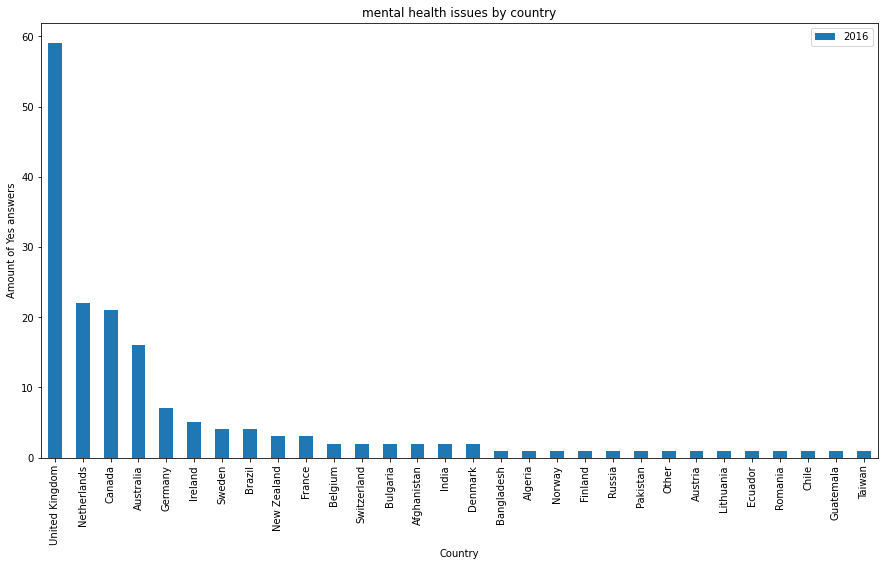

In [41]:
#Yes answers grouped by countries
country_names = []
country_values = []

country = dfquestions[(dfquestions['year'] == 2016) & (dfquestions['do you currently have a mental health issue'] == 'Yes')]['what country do you live?'].value_counts()

for i in range(len(country)):
    country_names.append(country.index[i])
    country_values.append(country[i])
    
country_names.pop(0)
country_values.pop(0)

df = pd.DataFrame(np.c_[country_values], index=country_names)
df.plot.bar(figsize=(15,8))
plt.xlabel('Country')
plt.ylabel('Amount of Yes answers')
plt.title('mental health issues by country')
plt.legend([2016])
plt.show()

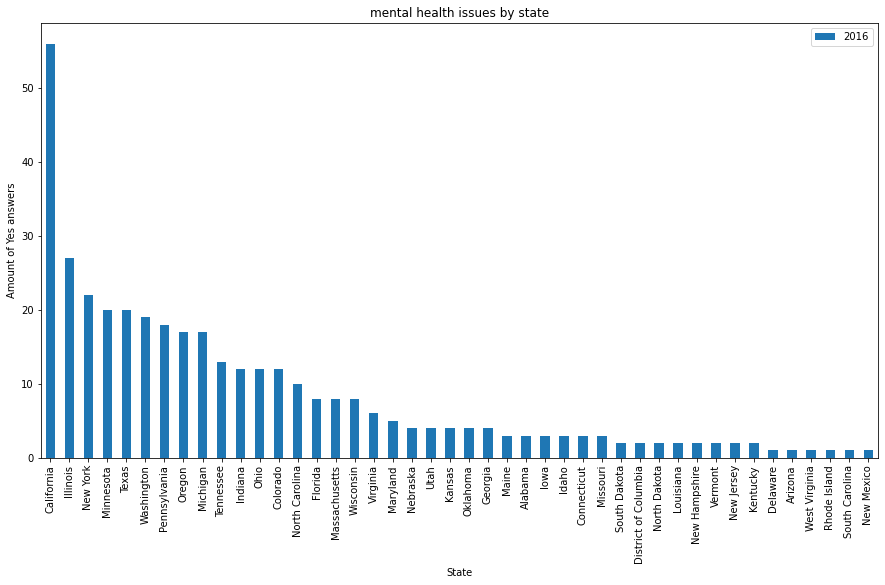

In [42]:
#Yes answers grouped by state
state_names = []
state_values = []

state = dfquestions[(dfquestions['year'] == 2016) & (dfquestions['do you currently have a mental health issue'] == 'Yes')]['if USA, what state'].value_counts()

for i in range(len(state)):
    state_names.append(state.index[i])
    state_values.append(state[i])

df = pd.DataFrame(np.c_[state_values], index=state_names)
df.plot.bar(figsize=(15,8))
plt.xlabel('State')
plt.ylabel('Amount of Yes answers')
plt.title('mental health issues by state')
plt.legend([2016])
plt.show()

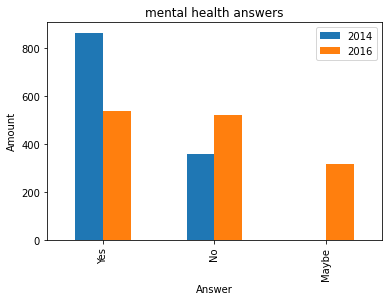

In [43]:
#answers over time
lable2016 = []
value2016 = []
lable2014 = []
value2014 = []

mental_health2016 = dfquestions[dfquestions['year'] == 2016]['do you currently have a mental health issue'].value_counts()
mental_health2014 = dfquestions[dfquestions['year'] == 2014]['do you currently have a mental health issue'].value_counts()

for i in range(len(mental_health2016)):
    lable2016.append(mental_health2016.index[i])
    value2016.append(mental_health2016[i])

for i in range(len(mental_health2014)):
    lable2014.append(mental_health2014.index[i])
    value2014.append(mental_health2014[i])
lable2014.append('Maybe')
value2014.append(0)

df = pd.DataFrame(np.c_[value2014,value2016], index=lable2016)
df.plot.bar()
plt.xlabel('Answer')
plt.ylabel('Amount')
plt.title('mental health answers')
plt.legend([2014,2016])
plt.show()

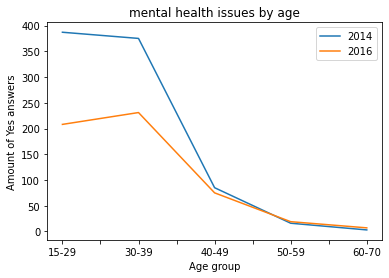

In [44]:
#yes answers by age group
#answers over time
lable2016 = []
value2016 = []
lable2014 = []
value2014 = []

bins = [15, 30, 40, 50, 60, 70]
labels = ['15-29', '30-39', '40-49', '50-59', '60-70']
ages2016 = pd.cut(dfquestions[(dfquestions['year'] == 2016)& (dfquestions['do you currently have a mental health issue'] == 'Yes')]['age'], bins, labels = labels,include_lowest = True)
ages2014 = pd.cut(dfquestions[(dfquestions['year'] == 2014)& (dfquestions['do you currently have a mental health issue'] == 'Yes')]['age'], bins, labels = labels,include_lowest = True)

df = pd.DataFrame({
   '2014': ages2014.value_counts().sort_index(),
   '2016': ages2016.value_counts().sort_index()
}, index=labels)

lines = df.plot.line()
plt.xlabel('Age group')
plt.ylabel('Amount of Yes answers')
plt.title('mental health issues by age')
plt.show()